In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [3]:
df.shape

(13320, 9)

In [4]:
## Segregating column area type to know how many plot area and all are present
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [5]:
df2=df.drop(['area_type',	'availability' , 'society' , 'balcony'] , axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
## data cleaning
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [7]:
df2['location']=df2['location'].fillna(df2['location'].mode()[0])



In [8]:
df2.isnull().sum()

,0
location,0
size,16
total_sqft,0
bath,73
price,0


In [9]:
df2['size']=df2['size'].fillna(df2['size'].mode()[0])
df2['bath']=df2['bath'].fillna(df2['bath'].mean())

In [10]:
df2.isnull().sum()
## now all null values are removed

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [11]:
df['size']

,size
0,2 BHK
1,4 Bedroom
2,3 BHK
3,3 BHK
4,2 BHK
...,...
13315,5 Bedroom
13316,4 BHK
13317,2 BHK
13318,4 BHK


In [12]:
## in our size column there are two terms BHK and bedroom taht are same so we will correct it
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df2['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [16]:
## there is a range coming in total_sqft so we will change it in float
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [17]:
df2[~df2['total_sqft'].apply(is_float)].head()    ## we use ~ because we want opp of statement

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2


In [18]:
## now i found my values by spliting so i we will write the average of both range
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None



In [19]:
convert_sqft_to_num('2166')

2166.0

In [20]:
print(convert_sqft_to_num('2100 - 2850'))


2475.0


In [21]:
df3=df2.copy()

In [22]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk


In [24]:
## now our dataframe looks much good than before
## we will do some feature engineering here
df4=df3.copy()

In [25]:
df4['price/sq_ft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price/sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
## now let's look location
len(df4.location.unique())

1305

In [27]:
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,541
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Whitefield,1
Sector 1 HSR Layout,1
Bhoganhalli,1


In [28]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Gunjur Palya,10
1st Block Koramangala,10
Ganga Nagar,10
Kalkere,10
Basapura,10
...,...
Whitefield,1
Sector 1 HSR Layout,1
Bhoganhalli,1


In [29]:
df4['location']=df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df4['location'].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Devanahalli', 'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar',
       'Haralur Road', 'Hennur Road', 'Kothannur', 'Kalena Agrahara',
       'Kaval Byrasandra', 'ISRO Layout', 'Garudachar Palya', 'EPIP Zone',
       'Dasanapura', 'Kasavanhalli', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele R

In [30]:
df4['location'].head()

,location
0,Electronic City Phase II
1,Chikka Tirupathi
2,Uttarahalli
3,Lingadheeranahalli
4,Kothanur


In [31]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price/sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
len(df3.location.unique())

1305

In [33]:
len(df4.location.unique())

242

In [34]:
## now detecting outlier and removing it
df4[df4['total_sqft']/df4['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price/sq_ft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df4.shape

(13320, 7)

In [36]:
df5=df4[~(df4['total_sqft']/df4['bhk']<300)]
df5.shape

(12576, 7)

In [37]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price/sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
df5[df5['total_sqft']/df5['bhk']<300].head()
## now no outliers of price here but there can be more outliers


,location,size,total_sqft,bath,price,bhk,price/sq_ft


In [39]:
df5['price/sq_ft'].describe()

,price/sq_ft
count,12530.000000
mean,6303.979357
std,4162.237981
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [40]:
## now we will removing very low and very high values
## using standard deviation here
def remove_outliers(df):
  df_out=pd.DataFrame()
  for key , subdf in df.groupby('location'):
    m=np.mean(subdf['price/sq_ft'])
    st=np.std(subdf['price/sq_ft'])
    reduced_df=subdf[(subdf['price/sq_ft']>(m-st)) & (subdf['price/sq_ft']<=(m+st))]
    df_out=pd.concat([df_out , reduced_df], ignore_index=True)
  return df_out



In [41]:
df6=remove_outliers(df5)
df6.shape

(10304, 7)

In [42]:
## now there are many points where their are same prices of 2bhk and 3bhk
## to see those we plot a scatter plot
def plot_scatter_plot(df,location):
  bhk2=df[(df.location==location)& (df.bhk==2)]
  bhk3=df[(df.location==location) & (df.bhk==3)]
  plt.scatter(bhk2.total_sqft , bhk2['price'] , color='blue' , label='2 BHK' , s=50)
  plt.scatter(bhk3.total_sqft , bhk3['price'] , marker='+', color='green' , label='3 BHK')
  plt.xlabel('total square feet')
  plt.ylabel('price per square feet')
  plt.title(location)
  plt.legend()
  plt.show()

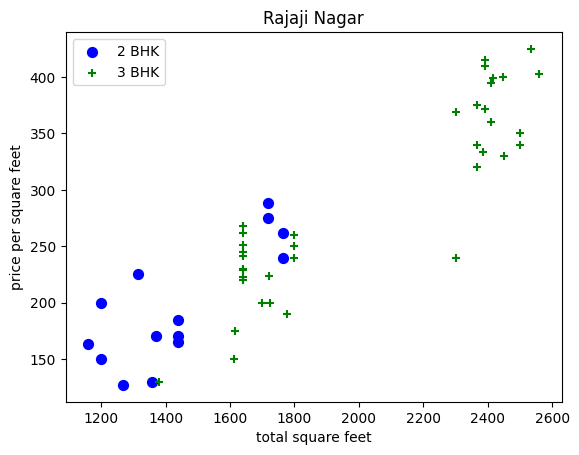

In [43]:
plot_scatter_plot(df6,'Rajaji Nagar')

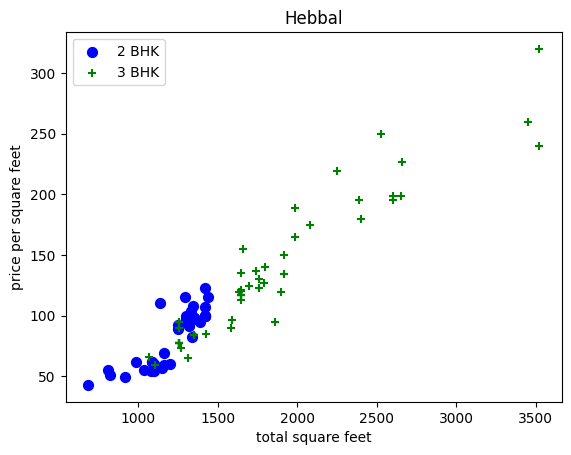

In [44]:
plot_scatter_plot(df6,'Hebbal')

In [45]:
## now i am trying to remove all these outliers also
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location , location_df in df.groupby('location'):
    bhk_stats={}
    for bhk , bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df['price/sq_ft']),
          'std':np.std(bhk_df['price/sq_ft']),
          'count':bhk_df.shape[0]
      }
    for bhk , bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices , bhk_df[bhk_df['price/sq_ft']<(stats['mean'])].index.values)
  return df.drop(exclude_indices , axis='index')
df7=remove_bhk_outliers(df6)
df7.shape

(7373, 7)

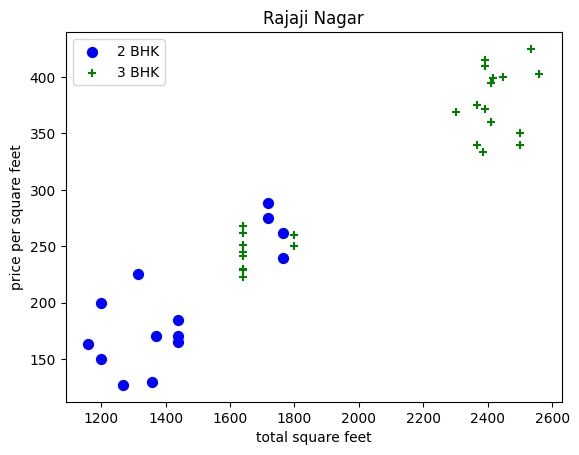

In [46]:
plot_scatter_plot(df7,'Rajaji Nagar')

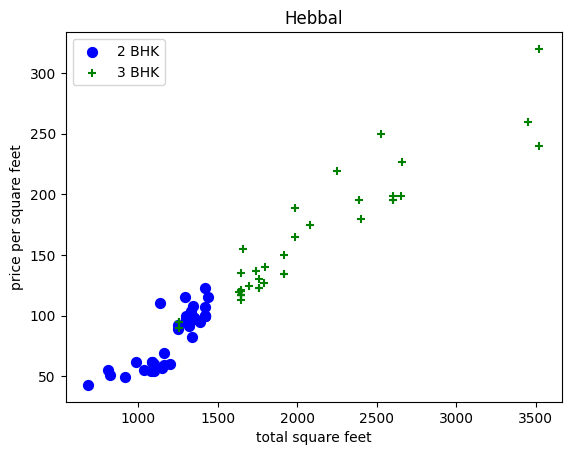

In [47]:
plot_scatter_plot(df7,'Hebbal')

Text(0, 0.5, 'count')

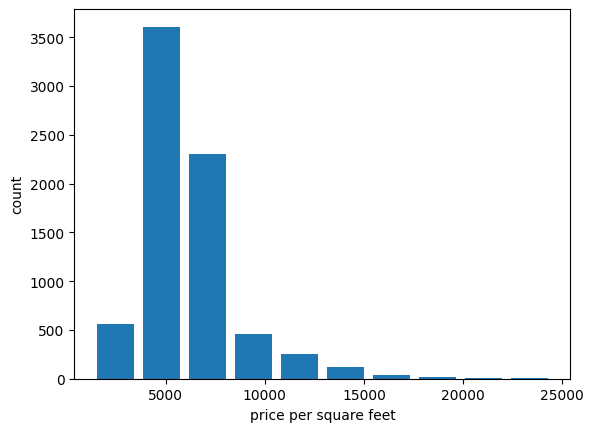

In [48]:
plt.hist(df7['price/sq_ft'] , rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [49]:
## now lets explore bathroom feature
df7.bath.unique()

array([ 2.        ,  3.        ,  4.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

In [50]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price/sq_ft
5307,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8538,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8627,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9366,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9699,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

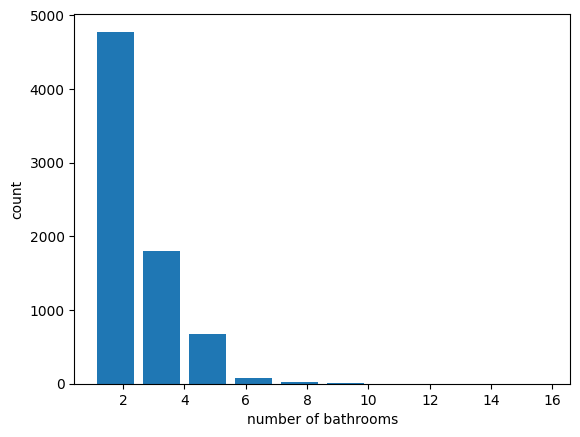

In [51]:
plt.hist(df7.bath , rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [52]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price/sq_ft
1648,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5268,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6750,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8462,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df8=df7[df7.bath<df7.bath+2]
df8.shape

(7373, 7)

In [54]:
## now our dataframe looks much good so will start with model training
## droping unnecassary columns like size and price/sq_ft
df9=df8.drop(['size' , 'price/sq_ft'], axis=1)

In [55]:
df9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [56]:
## now to train model we need everything in numeric form but location is in text form so use one hot encoding to change it
dummies=pd.get_dummies(df9.location).astype('int')
df10=pd.concat([df9 , dummies.drop('other' , axis=1)] , axis='columns')
df10.head()



,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df11=df10.drop(['location'  ], axis=1)
df11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11.shape

(7373, 245)

In [59]:
x=df11.drop('price' , axis=1)
y=df11['price']

In [60]:
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y.head()

,price
1,40.0
2,83.0
3,40.0
4,65.0
5,43.0


In [62]:
## now train data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2 ,  random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train , y_train)
lr.score(x_test , y_test)

0.9054270451480637

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
cross_val_score(LinearRegression() , x , y , cv=cv)


array([0.86145511, 0.85124606, 0.86876529, 0.85163536, 0.85272231])

In [65]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model_using_grid_search_cv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]  # Deprecated
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores , columns=['model' , 'best_score' , 'best_params'])




find_best_model_using_grid_search_cv(x, y)

,model,best_score,best_params
0,linear_regression,0.857165,{}
1,lasso,0.715494,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.743190,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [66]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [67]:
np.where(x.columns=='1st Phase JP Nagar')[0][0]

np.int64(5)

In [68]:
def predict_pri(location, sqft, bath, bhk):

    location_index = np.where(x.columns == location)[0][0]
    x_i= np.zeros(len(x.columns))
    x_i[0] = sqft
    x_i[1] = bath
    x_i[2] = bhk
    if location_index >= 0:
        x_i[location_index] = 1

    return lr.predict([x_i])[0]



In [69]:
predict_pri('1st Phase JP Nagar' , 1000, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.53160280485076)

In [70]:
predict_pri('1st Phase JP Nagar' , 1000, 2, 3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(82.79834939560376)

In [71]:
predict_pri('Indira Nagar' , 1000, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(189.4280843812209)

In [73]:
predict_pri('Indira Nagar' , 1000, 3, 3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(188.6039657015258)

In [75]:
## SO HURRY! OUR MODEL IS PREDICTING ALL RIGHT AND NICE
##BRIGHT AND SHINE IT'S EXPORTING TIME
import pickle
with open('bengaluru_house_price.pickle','wb')as f:
  pickle.dump(lr,f)

In [76]:
import json
columns={     ## as we need columns names when we make a web page
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json', 'w')as f:
  f.write(json.dumps(columns))


In [77]:
## NOW FINALLY OUR MODEL IS CLEANED TRAINED AND ALSO WE IMPORT IN PICKLE AND JSON FILE
## NOW WE NEED TO WRITE OUR FLASK CODE FOR BACKENED THING

